# 🧠 Modelo de Regressão para Previsão de Preços de Veículos

📌 2. Data Understanding
**Objetivo**: entender o conteúdo, a estrutura e a qualidade dos dados.

🔍 Aqui você:
- Analisa a qualidade inicial dos dados
- Verifica valores ausentes, tipos de dados, distribuições
- Identifica valores extremos, inconsistências, duplicatas
- Verifica a estrutura dos dados
- Realiza estatísticas descritivas iniciais (describe, value_counts)



### 📘 Data Dictionary – Car Price Prediction Dataset

**Dataset Information**
This data set consists of three types of entities: 
- (a) the specification of an auto in terms of various characteristics; 
- (b) it's assigned insurance risk rating;
- (c) it's normalized losses in use as compared to other cars.  

The second rating (b) `symboling` corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price.   Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "symboling".
A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 
The third factor (c) `normalized-losses` is the relative average loss payment per insured vehicle year.  This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

This data dictionary provides a structured description of the variables used in the car price prediction dataset.

| Variable Name       | Role                | Type Variable | Description |
|---------------------|---------------------|----------------|-------------|
| symboling           | Feature             | Categorical    | Risk factor assigned by insurance (ranging from -3 to 3; higher means more risky) |
| normalized-losses   | Feature             | Continuous     | Relative average loss paid by insurance; indicates vehicle damage risk |
| make                | Feature             | Categorical    | Manufacturer brand of the car |
| fuel-type           | Feature             | Categorical    | Type of fuel the car uses (gas or diesel) |
| aspiration          | Feature             | Categorical    | Engine type: standard or turbocharged |
| num-of-doors        | Feature             | Categorical    | Number of doors in the vehicle |
| body-style          | Feature             | Categorical    | Body type of the car (e.g., sedan, hatchback) |
| drive-wheels        | Feature             | Categorical    | Type of drivetrain (front, rear, or 4-wheel drive) |
| engine-location     | Feature             | Categorical    | Location of the engine (front or rear) |
| wheel-base          | Feature             | Continuous     | Distance between front and rear wheels (affects stability) |
| length              | Feature             | Continuous     | Overall length of the vehicle in inches |
| width               | Feature             | Continuous     | Width of the vehicle in inches |
| height              | Feature             | Continuous     | Height of the vehicle in inches |
| curb-weight         | Feature             | Continuous     | Total weight of the car without passengers or cargo |
| engine-type         | Feature             | Categorical    | Engine configuration (e.g., OHV, OHC, DOHC) |
| num-of-cylinders    | Feature             | Categorical    | Number of cylinders in the engine |
| engine-size         | Feature             | Continuous     | Engine displacement in cubic centimeters |
| fuel-system         | Feature             | Categorical    | Type of fuel injection system |
| bore                | Feature             | Continuous     | Diameter of each cylinder in inches |
| stroke              | Feature             | Continuous     | Distance the piston travels within the cylinder (in inches) |
| compression-ratio   | Feature             | Continuous     | Ratio of engine cylinder volume to combustion chamber volume |
| horsepower          | Feature             | Continuous     | Engine power output measured in horsepower |
| peak-rpm            | Feature             | Continuous     | Engine speed at which maximum horsepower is generated |
| city-mpg            | Feature             | Continuous     | Fuel consumption in city driving (miles per gallon) |
| highway-mpg         | Feature             | Continuous     | Fuel consumption on highways (miles per gallon) |
| price               | Target              | Continuous     | Selling price of the car in USD |


In [304]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline

#### Load Data

In [290]:
# Load Dataset in .csv
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(file_path, header=None)

# Show All colls from dataset
pd.set_option('display.max_columns', None)

# View the top 5 rows of the dataset
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Data Structure Exploration

In [291]:
# Rename the collums name
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers

df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [292]:
# Check the shape of the DataFrame
total_raw_rows = df.shape[0]
total_raw_cols = df.shape[1]
print("Total Rows:",total_raw_rows)
print("Total Cols:",total_raw_cols)

Total Rows: 205
Total Cols: 26


In [293]:
# Examine the data types of each column
print("Data Types:")
df.dtypes


Data Types:


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [294]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Show the Missing Data Values
#df[df.isnull()]

Missing Values:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [295]:
# Check there is duplicated data
df.duplicated().sum()

# Show the duplicated Data
df[df.duplicated()]

# Drop Duplicated
#df.drop_duplicates(inplace=True)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [296]:
# Check the inconsistent Data
for i, col in enumerate(df.columns): 
    unique_vals = df[col].unique()
    print(f"Name Col: {col}: \n Unique Values: {unique_vals[:10]} \n")


df['num-of-doors'].value_counts(normalize = True) * 100

# Possível identificar que as colunas `normalized-losses` e `num-of-doors` e `price` possui inconsistências nos dados com valor "?"

Name Col: symboling: 
 Unique Values: [ 3  1  2  0 -1 -2] 

Name Col: normalized-losses: 
 Unique Values: ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148'] 

Name Col: make: 
 Unique Values: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz'] 

Name Col: fuel-type: 
 Unique Values: ['gas' 'diesel'] 

Name Col: aspiration: 
 Unique Values: ['std' 'turbo'] 

Name Col: num-of-doors: 
 Unique Values: ['two' 'four' '?'] 

Name Col: body-style: 
 Unique Values: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 

Name Col: drive-wheels: 
 Unique Values: ['rwd' 'fwd' '4wd'] 

Name Col: engine-location: 
 Unique Values: ['front' 'rear'] 

Name Col: wheel-base: 
 Unique Values: [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4] 

Name Col: length: 
 Unique Values: [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197. ] 

Name Col: width: 
 Unique Values: [64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9] 

Name Col: hei

num-of-doors
four    55.609756
two     43.414634
?        0.975610
Name: proportion, dtype: float64

In [297]:
# Handling Inconsistence Data `price`
df['price'] = df['price'].replace('?', np.nan)

df.dropna(subset=['price'], axis=0, inplace=True)

df["price"] = pd.to_numeric(df["price"])

df.reset_index(inplace=True)


n_rows = total_raw_rows - df.shape[0]
print ("Total de Linhas removidas: ", n_rows)


Total de Linhas removidas:  4


In [303]:
# Handling Outliers

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outliers = df[((df['price'] < lower_bound) | (df['price'] > upper_bound))]

print("Total de Outliers Identificados: ", df_outliers.shape[0])

Total de Outliers Identificados:  0


<Axes: title={'center': 'Preço'}, xlabel='USD'>

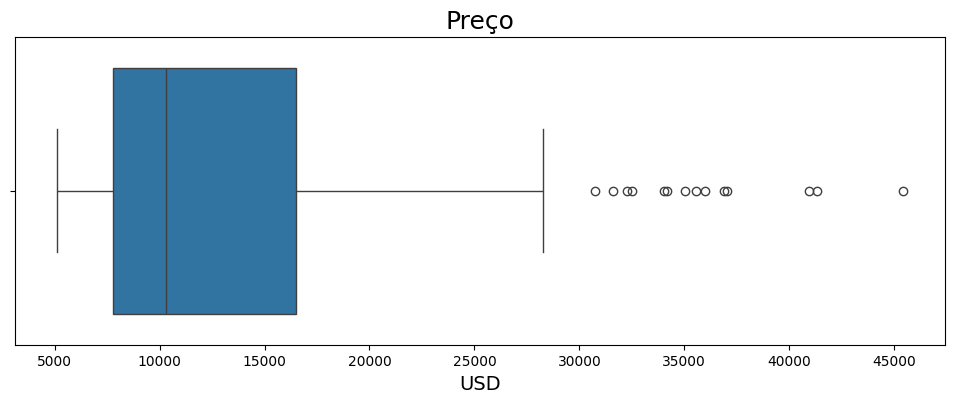

In [315]:
# Check the Dispersion General

ax = sns.boxplot(x='price', data=df)

ax.figure.set_size_inches(12, 4)
ax.set_title('Preço', fontsize=18)
ax.set_xlabel('USD', fontsize=14)
ax

<Axes: title={'center': 'Preço por Fabricante'}, xlabel='Fabricante', ylabel='make'>

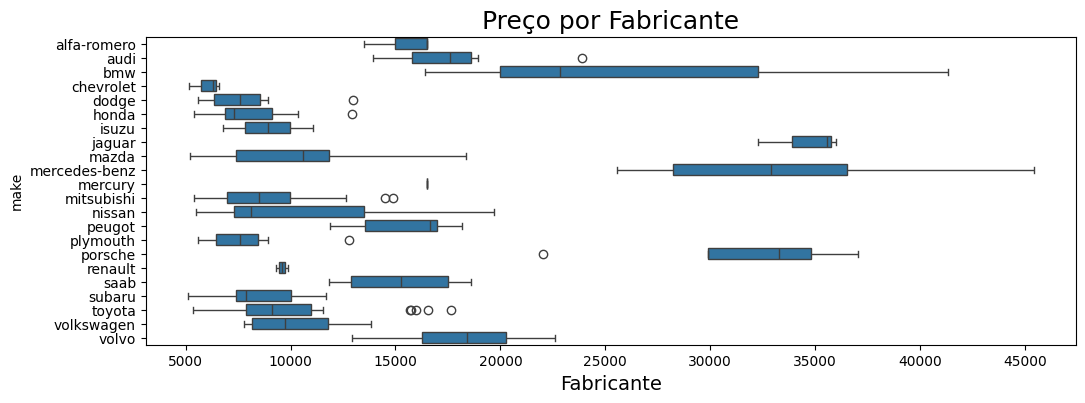

In [314]:
# Check the Dispersion 
ax = sns.boxplot(x='price', y='make', data=df)

ax.figure.set_size_inches(12, 4)
ax.set_title('Preço por Fabricante', fontsize=18)
ax.set_xlabel('Fabricante', fontsize=14)
ax

# Analisando a dispersão por fabricante, vemos que os veículos de marca = ['bmw, 'mercedez-benz'] veículos de luxo possui uma maior discrepância

<Axes: title={'center': 'Preço por Fabricante'}, xlabel='Fabricante', ylabel='make'>

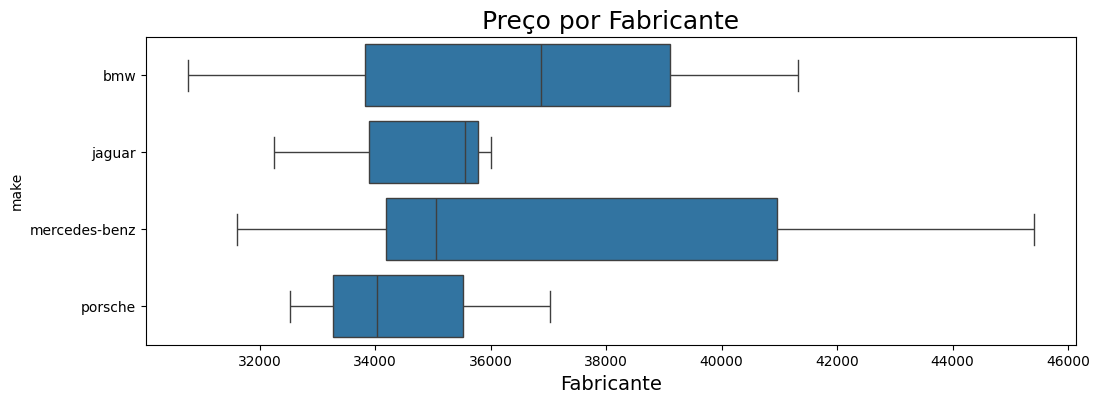

In [313]:
# Filter price > 30k by make
ax = sns.boxplot(x='price', y='make', data=df.query('price > 30000') )

ax.figure.set_size_inches(12, 4)
ax.set_title('Preço por Fabricante', fontsize=18)
ax.set_xlabel('Fabricante', fontsize=14)
ax

# Filtrando os preços acima de 30000 fica mais evidente que os fabricantes bmw e mercedez possui uma maior discrepância 

Mediana 10295.0
Media 13207.129353233831
Distribuição Assimetrica á Direita: moda < media < mediana 


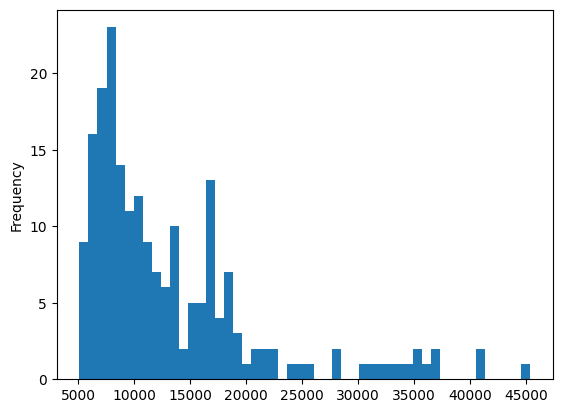

In [300]:
# Check the Freq. Distribution of target value `price`
df['price'].plot(kind="hist", bins=50)

print("Mediana", df['price'].median())
print("Media", df['price'].mean())

print("Distribuição Assimetrica á Direita: moda < media < mediana ")

In [301]:
from scipy.stats import normaltest

signif = 0.05
stat_test, p_valor = normaltest(df['price'])
print(stat_test)
print(p_valor)

# True - ou seja rejeita a Hipotese Nula, nos diz que a coluna `price` não faz parte de uma distribuição normal
p_valor <= signif

print("Distribuição não é normal!!")


78.3737893700999
9.579611029816525e-18
Distribuição não é normal!!


In [302]:
# Describe the numerical variables 
df.describe()

,index,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,102.900498,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,59.234956,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,0.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,53.000000,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,204.000000,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


### 📋 Initial Observations

#### Data Quality Issues:

| Nº Item | Item                                                   | Status  | Comentários                                                 |
|---------|--------------------------------------------------------|---------|-------------------------------------------------------------|
| 01      | Valores ausentes (Missing Data)                        | OK      | não identificado                                            |
| 02      | Duplicidade de registros                               | OK      | não identificado                                            |
| 03      | Inconsistência de formato                              | not OK  | identificado:  `price`, `normalized-losses`, `num-of-doors` |
| 04      | Erros de digitação                                     | OK      | não identificado                                            |
| 05      | Valores fora do intervalo esperado (Outliers)          | not OK  | identificado 14 registros com preços acima da média         |
| 06      | Tipos de dados incorretos                              | Not Ok  | alterar formato das colunas categórica `object`             |
| 07      | Dados inconsistentes entre colunas                     | Ok      | não identificado                                            |
| 08      | Alta cardinalidade em variáveis categóricas            | Ok      | não identificado                                            |
| 09      | Dados desatualizados                                   | NA      | não aplicável                                               |
| 10      | Dados incompletos (sem cobertura em algumas regiões)   | Ok      | Registros ausentes da região Norte                          |


#### Distribuição dos Dados
- Presença de outliers na variável `price` com 14 registros acima da média, verificado que os fabricantes `bmw` e `mercedez-bens` possui uma maior discrepância com valores acima de 30k
- A distribuição da variável target `price` é Assimétrica ( Skewness) á Direita (Moda < Media < Mediana);
- A distribuição dos dados não é normal considerando os outliers (p-value < significancia_alpha)

